In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [190]:
file='https://raw.githubusercontent.com/Dennieeeee/COVID19-Pandemic/master/covid19_unemployment_2020'
df=pd.read_csv(file)

# Columns
- ALAND: Area of Land (square meters)
- AWATER: Area of Water (square meters)
- NAME: City Name
- State: State
- LaborForce_01Month: Count of people within the US labor force, 1 month prior to current
- Employed_01Month: Count of employed population, 1 month prior to current
- Unemployed_01Month: Count of unemployed population, 1 month prior to current
- PctUnemployed_01Month: Percent unemployed population, 1 month prior to current
- CurrentMonth: Month and year, most current month offered by BLS
- vulnerability_index: Vulnerability Index
- rank_cvi: Rank
- fips_cvi: Fips

In [191]:
df.head()

,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi
0,1539602137,25706961,Autauga County,Alabama,25835.0,25114.0,721.0,2.8,April 2020 - Preliminary,110.31,401,1001
1,4117621645,1132980868,Baldwin County,Alabama,96391.0,93782.0,2609.0,2.7,April 2020 - Preliminary,146.88,91,1003
2,2292160139,50523213,Barbour County,Alabama,8537.0,8221.0,316.0,3.7,April 2020 - Preliminary,87.78,1455,1005
3,1612167476,9602089,Bibb County,Alabama,8617.0,8348.0,269.0,3.1,April 2020 - Preliminary,69.94,2398,1007
4,1670103866,15015467,Blount County,Alabama,25103.0,24421.0,682.0,2.7,April 2020 - Preliminary,92.04,1224,1009


In [192]:
#Create a new column
#Employed rate = Employed_01Month/LaborForce_01Month
df['percent_employed']=df['Employed_01Month']/df['LaborForce_01Month']


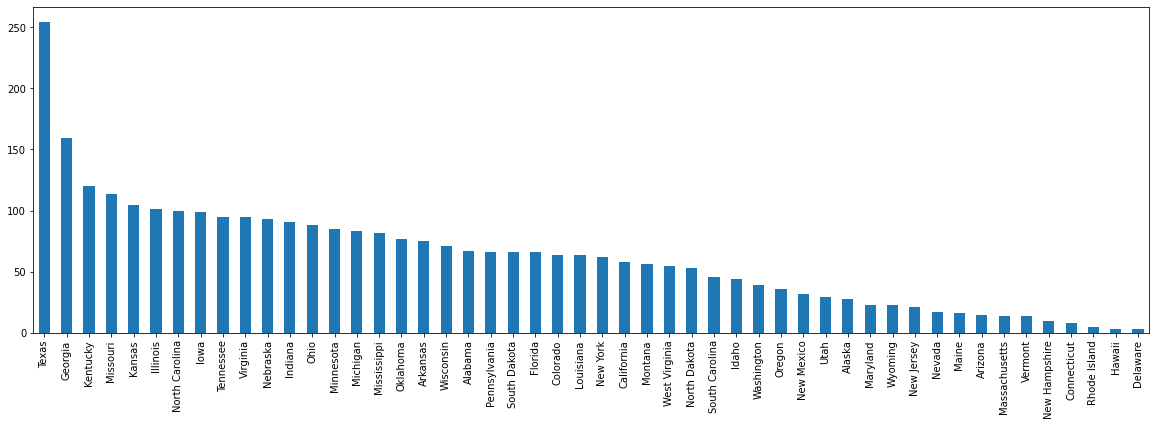

In [193]:
df['State'].value_counts().plot(kind='bar',figsize=(20,6))

In [194]:
df1=df[['State','NAME','LaborForce_01Month','Employed_01Month','Unemployed_01Month','PctUnemployed_01Month','percent_employed']]

In [195]:
df1.describe()

,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
count,3.090000e+03,3.090000e+03,3090.000000,3090.000000,3090.000000
mean,5.180697e+04,4.945582e+04,2351.149838,4.819029,0.951817
std,1.691945e+05,1.605313e+05,9012.870859,2.053298,0.020529
min,2.080000e+02,1.900000e+02,6.000000,0.800000,0.764973
25%,4.857250e+03,4.603750e+03,227.000000,3.500000,0.943473
50%,1.155850e+04,1.102800e+04,539.500000,4.400000,0.955691
75%,3.129400e+04,3.002500e+04,1450.750000,5.675000,0.965192
max,4.996564e+06,4.669061e+06,327503.000000,23.500000,0.991561


In [196]:
#Find out the average and median unemployment for each state
df1.groupby('State').agg(['mean','median']).head()

LaborForce_01Month           ... percent_employed          
                         mean   median  ...             mean    median
State                                   ...                           
Alabama          33240.402985  14553.0  ...         0.965245  0.968473
Alaska           12119.678571   2876.0  ...         0.909344  0.911053
Arizona         239230.133333  52093.0  ...         0.916547  0.925280
Arkansas         18373.653333   7960.0  ...         0.942321  0.945182
California      330898.568966  82591.0  ...         0.924069  0.933033

[5 rows x 10 columns]

In [197]:
df1.head(2)

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092
1,Alabama,Baldwin County,96391.0,93782.0,2609.0,2.7,0.972933


In [198]:
# Top 5 counties with the highest labor force
index_top5 = list(df['LaborForce_01Month'].sort_values(ascending=False).index[:5])
laborForce_top5 = df1.loc[index_top5]

In [199]:
laborForce_top5

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
203,California,Los Angeles County,4996564.0,4669061.0,327503.0,6.6,0.934454
605,Illinois,Cook County,2615106.0,2488391.0,126715.0,4.8,0.951545
102,Arizona,Maricopa County,2334396.0,2209663.0,124733.0,5.3,0.946567
2610,Texas,Harris County,2321037.0,2191290.0,129747.0,5.6,0.944100
214,California,Orange County,1587658.0,1528641.0,59017.0,3.7,0.962828


In [200]:
y=list(laborForce_top5.LaborForce_01Month)
x=[1,2,3,4,5]
t=list(laborForce_top5.NAME.values)

Text(0.5, 1.0, 'Top 5 Labor Forces')

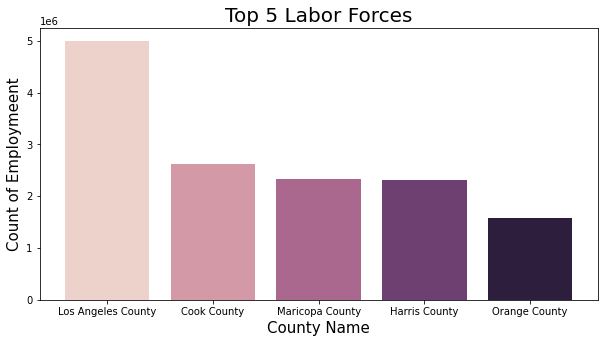

In [201]:
plt.figure(figsize=(10,5))
b_col = sns.cubehelix_palette(5,reverse=False) #reverse by default is False
plt.bar(x,y,color=b_col)
plt.xticks(x,t)
plt.xlabel('County Name',size=15)
plt.ylabel('Count of Employmeent',size=15)
plt.title('Top 5 Labor Forces',size=20)

In [202]:
#sorted by the unemployment in the county, decending order
unemp_index_top5 = list(df1.PctUnemployed_01Month.sort_values(ascending=False).index[:5])
unemp_top5 = df1.loc[unemp_index_top5]
unemp_top5

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
190,California,Colusa County,11471.0,8775.0,2696.0,23.5,0.764973
1800,New Mexico,Luna County,10809.0,8547.0,2262.0,20.9,0.790730
197,California,Imperial County,73121.0,57905.0,15216.0,20.8,0.791907
2947,West Virginia,Calhoun County,2762.0,2209.0,553.0,20.0,0.799783
81,Alaska,Kusilvak Census Area,2680.0,2214.0,466.0,17.4,0.826119


In [203]:
y2=list(unemp_top5.PctUnemployed_01Month)
x2=[1,2,3,4,5]
t2=list(unemp_top5.NAME.values)

Text(0.5, 1.0, 'Counties with the highest unemployment rate')

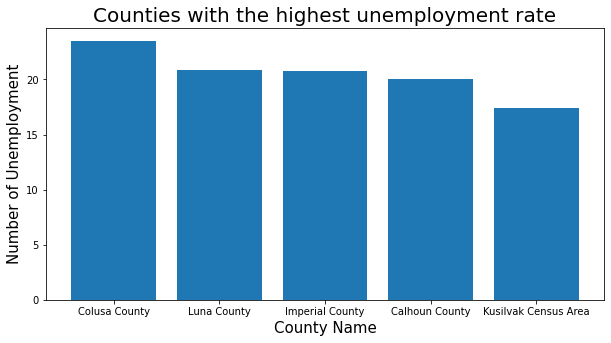

In [204]:
plt.figure(figsize=(10,5))
plt.bar(x2,y2)
plt.xticks(x2,t2)
plt.xlabel('County Name',size=15)
plt.ylabel('Number of Unemployment',size=15)
plt.title('Counties with the highest unemployment rate',size=20)

In [205]:
top5_employment_rate_index = list(df['percent_employed'].sort_values(ascending=False).index[:5])
top5_employment_rate = df.loc[top5_employment_rate_index]
top5_employment_rate

,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi,percent_employed
2660,1732230054,19981167,Loving County,Texas,711.0,705.0,6.0,0.8,April 2020 - Preliminary,42.03,3081,48301,0.991561
1989,3265658855,86686807,Divide County,North Dakota,1381.0,1364.0,17.0,1.2,April 2020 - Preliminary,100.30,766,38023,0.987690
2023,1844441513,8435674,Steele County,North Dakota,984.0,969.0,15.0,1.5,April 2020 - Preliminary,76.64,2067,38091,0.984756
2008,4727397872,301102221,Mountrail County,North Dakota,7340.0,7228.0,112.0,1.5,April 2020 - Preliminary,78.44,1974,38061,0.984741
1990,5201969429,190528746,Dunn County,North Dakota,3352.0,3300.0,52.0,1.6,April 2020 - Preliminary,68.67,2457,38025,0.984487


In [206]:
y3=top5_employment_rate['percent_employed']
x3=[1,2,3,4,5]
t3=list(top5_employment_rate.NAME.values)

<BarContainer object of 5 artists>

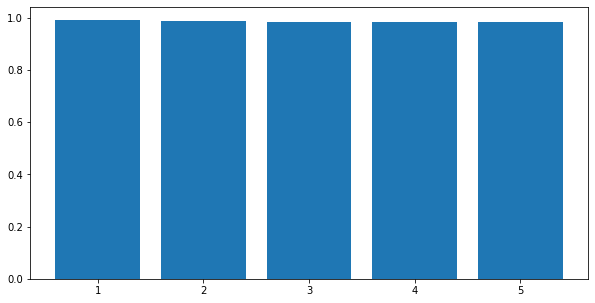

In [207]:
plt.figure(figsize=(10,5))
plt.bar(x3,y3)

# Outliers
Unemployment

In [208]:
'''
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1 - mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();
'''

'\nmean, std = np.mean(d1), np.std(d1)\nz_score = np.abs((d1 - mean) / std)\nthreshold = 3\ngood = z_score < threshold\n\nprint(f"Rejection {(~good).sum()} points")\nfrom scipy.stats import norm\nprint(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")\nvisual_scatter = np.random.normal(size=d1.size)\nplt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")\nplt.scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")\nplt.legend();\n'

In [209]:
df1.head(1)

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092


Rejection 3090 points
z-score of 3 corresponds to a prob of 0.27%


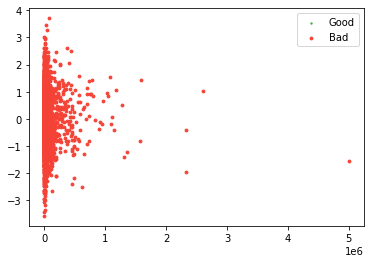

In [210]:
mean, std=np.mean(df1['LaborForce_01Month']), np.std(df1['LaborForce_01Month'])
z_score = np.abs(df1['LaborForce_01Month']-mean / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['LaborForce_01Month'].size)
plt.scatter(df1['LaborForce_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['LaborForce_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()

Rejection 2635 points
z-score of 3 corresponds to a prob of 0.27%


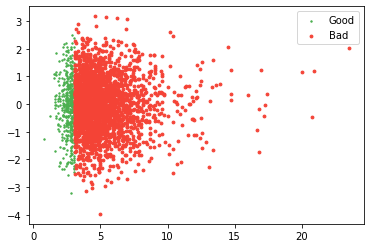

In [211]:
mean, std=np.mean(df1['PctUnemployed_01Month']), np.std(df1['Unemployed_01Month'])
z_score = np.abs(df1['PctUnemployed_01Month']-mean / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['PctUnemployed_01Month'].size)
plt.scatter(df1['PctUnemployed_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['PctUnemployed_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()

Rejection 3090 points
z-score of 3 corresponds to a prob of 0.27%


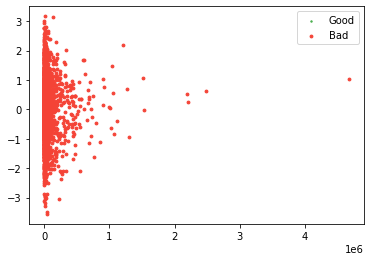

In [212]:
mean, std=np.mean(df1['Employed_01Month']), np.std(df1['Employed_01Month'])
z_score = np.abs(df1['Employed_01Month']-mean / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['Employed_01Month'].size)
plt.scatter(df1['Employed_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['Employed_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()

In [213]:
df1['LaborForce_01Month'] = df1['LaborForce_01Month'][good]
df1['PctUnemployed_01Month']= df1['PctUnemployed_01Month'][good]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


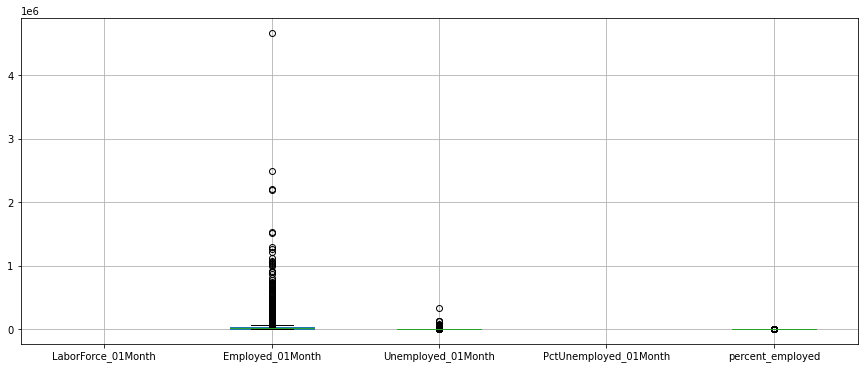

In [214]:
df1.boxplot(figsize=(15,6))

{'boxes': [<matplotlib.lines.Line2D at 0x7ff0b1bd4dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff0b1be1828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0b1be82e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff0b1be1f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff0b1be1128>,
  <matplotlib.lines.Line2D at 0x7ff0b1be14a8>]}

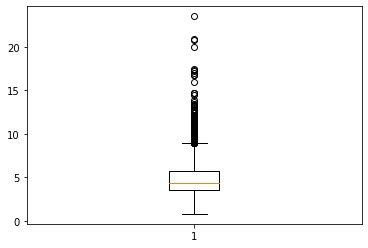

In [215]:
plt.boxplot(df['PctUnemployed_01Month'])

{'boxes': [<matplotlib.lines.Line2D at 0x7ff0b1b3b438>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff0b1b3be48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0b1b48908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff0b1b48588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff0b1b3b748>,
  <matplotlib.lines.Line2D at 0x7ff0b1b3bac8>]}

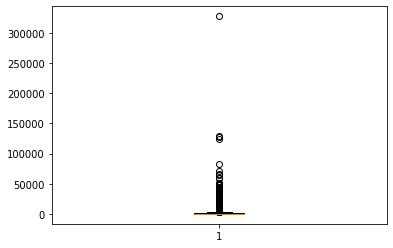

In [216]:
plt.boxplot(df['Unemployed_01Month'])

# Trim Outliers (Recommended)
Remove outliers on df1_copy version

In [217]:
#Make a copy version of df1
df1_copy = df1.copy()

In [229]:
#Trim outliers:
starting_percentile = df1_copy['PctUnemployed_01Month'].quantile(.02)
ending_percentile = df1_copy['PctUnemployed_01Month'].quantile(.98)
price_outliers_df = df1_copy.loc[((df1_copy['PctUnemployed_01Month'] <= starting_percentile) | (df1_copy['PctUnemployed_01Month'] >= ending_percentile))]
df_trimmed = df1_copy.loc[((df1_copy['PctUnemployed_01Month'] > starting_percentile) & (df1_copy['PctUnemployed_01Month'] < ending_percentile))]

In [230]:
# Drop incomplete cases
df1_copy_filtered = df_trimmed.dropna()

In [231]:
df1_copy_filtered

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed


In [232]:
print(df1.shape,df1_copy_filtered.shape)

(3090, 7) (0, 7)


# Histogram

In [219]:
df1.columns

Index(['State', 'NAME', 'LaborForce_01Month', 'Employed_01Month',
       'Unemployed_01Month', 'PctUnemployed_01Month', 'percent_employed'],
      dtype='object')

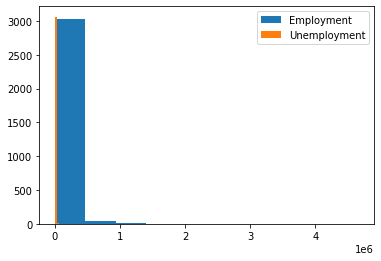

In [220]:
plt.hist(df1['Employed_01Month'],label='Employment')
plt.hist(df1['Unemployed_01Month'],label='Unemployment')
plt.legend()